In [46]:
%matplotlib inline

import networkx as nx
import matplotlib.pyplot as pl
import lib.directed_watts_strogatz as dws

import numpy as np

import graph_tool.all as gt

from lib.nx2gt import nx2gt

In [59]:

def make_graphs(N=50,p=0.2):
    g_edr = nx.gnp_random_graph(N,p, directed=True)
    g_smw = nx.from_numpy_array(dws.watts_strogatz(N, p, 0.1, directed=True), 
                                create_using=nx.DiGraph())
    #g_scf = nx.scale_free_graph(N)
    
    x = gt.price_network(N, N*p)     
    x.save('main.gml')
    g_scf=nx.read_gml('main.gml', label='id')
    
    return (g_edr, g_smw, g_scf)

def make_graphs_gt(N=50,p=0.2):
    graphs = make_graphs(N)
    gt_s = []
    for g in graphs:
        gt_s.append(nx2gt(g))
        
    gt_s[-1] = gt.price_network(N, N*p) 
    
    gt_s[-1].save('main.gml')
    
    return gt_s

def shuffle_nodes(g):
    mapping = dict()
    N = g.number_of_nodes()
    xx=np.arange(N)
    np.random.shuffle(xx)
    for i in range(N):
        mapping={**mapping, **{i:xx[i]+N}}
    h = nx.relabel_nodes(g, mapping, copy=False)
    return h

## Analyzing networks

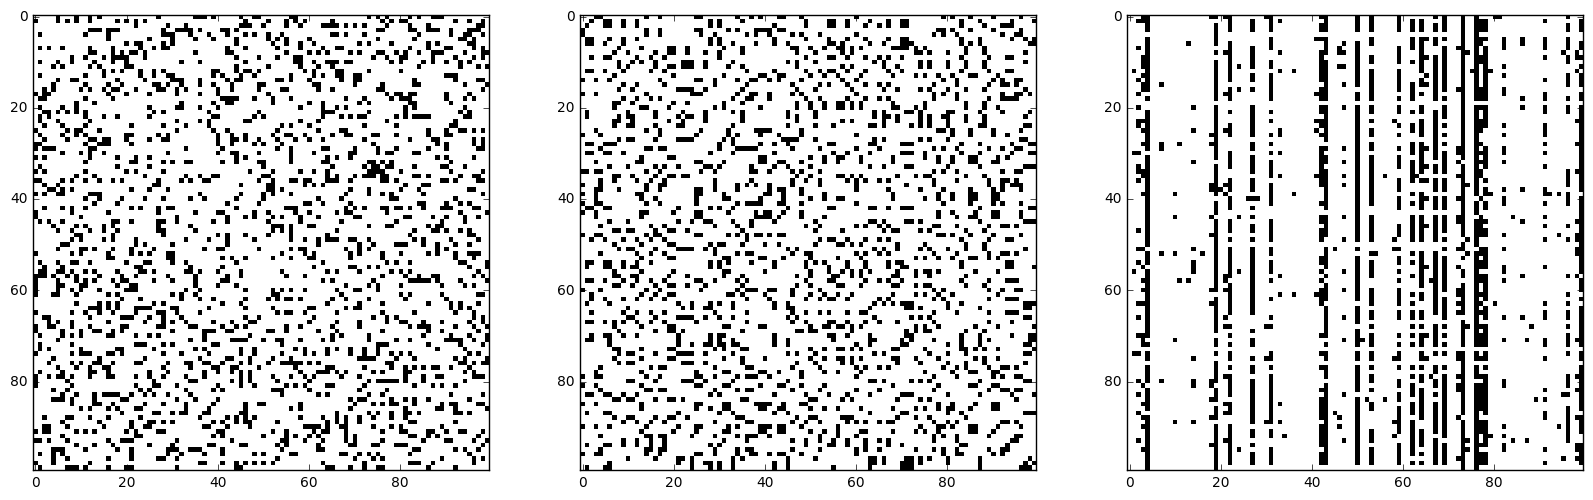

In [60]:
nets = make_graphs(N=100) 
fig, (axs) = pl.subplots(nrows=1, ncols=3, figsize=(20, 10));
for g,ax in zip(nets,axs):
    g = shuffle_nodes(g)
    A=nx.to_numpy_matrix(g)
    ax.imshow(A, aspect='equal', cmap='Greys',  interpolation='nearest')

## Analyzing networks

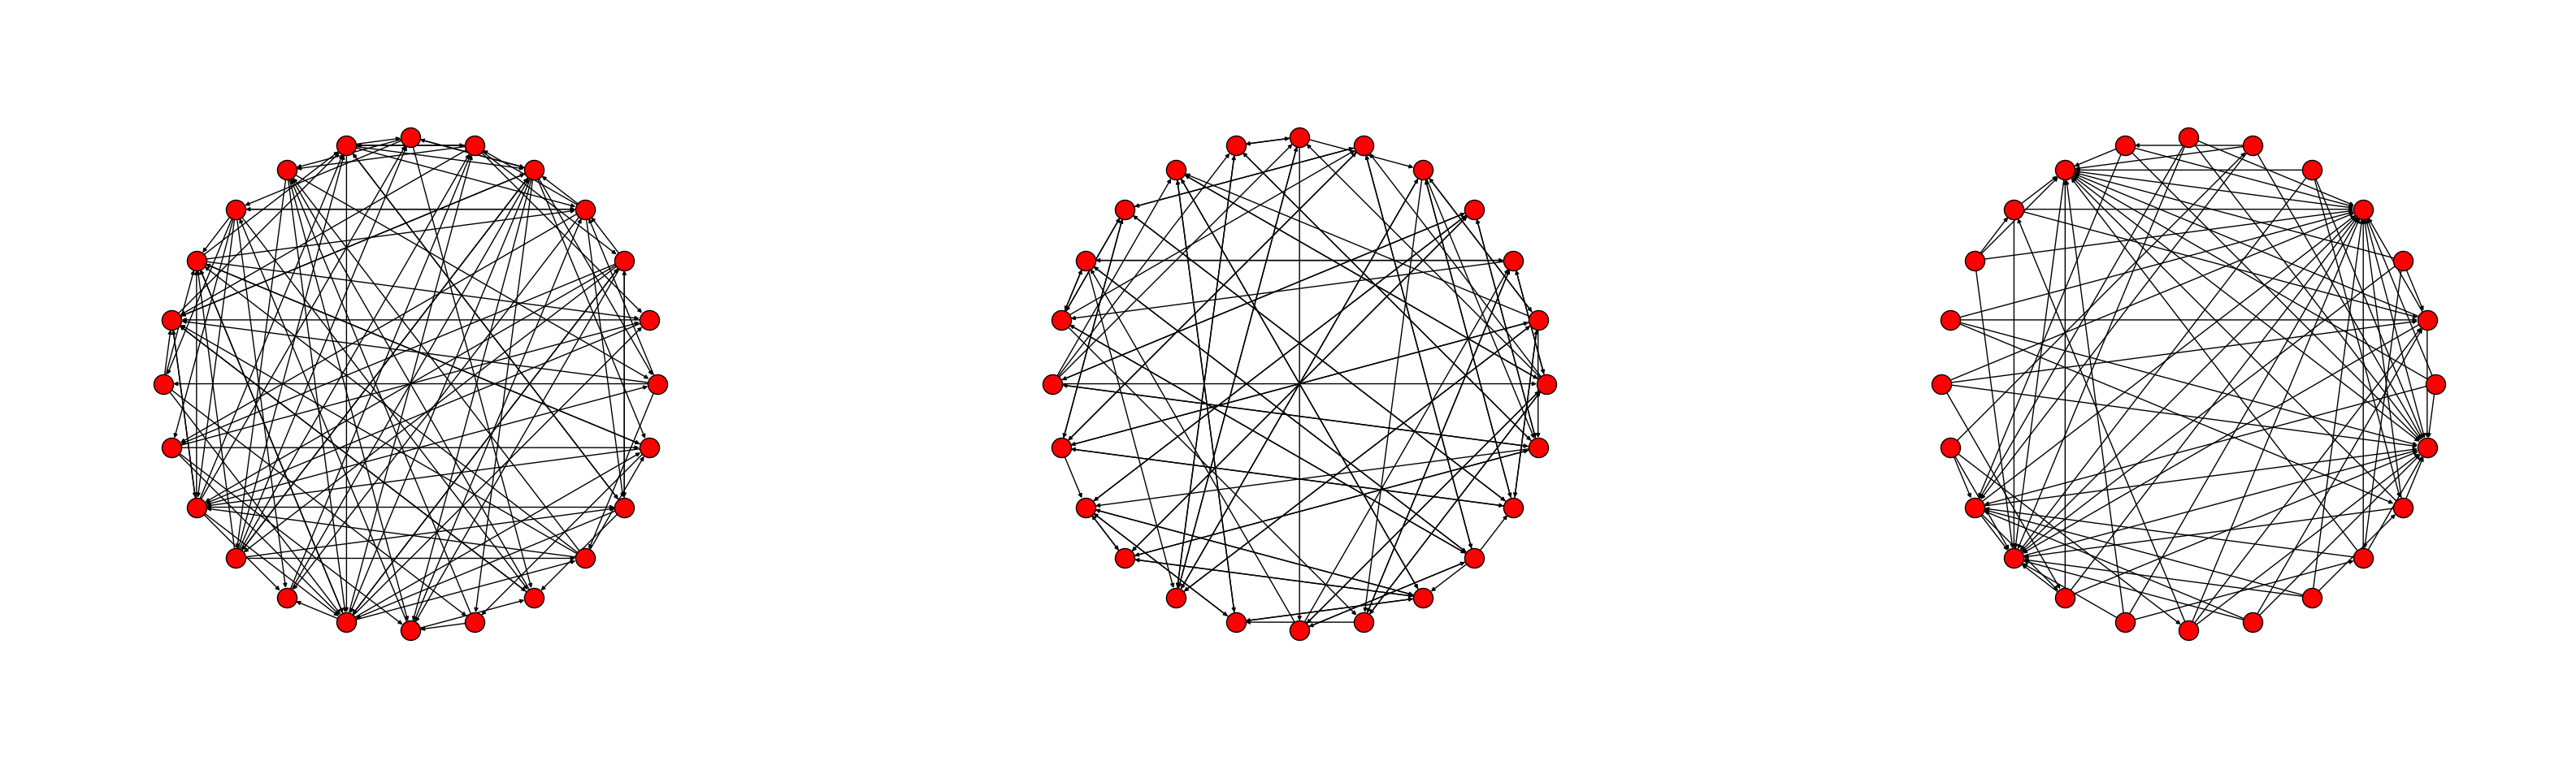

In [61]:
nets = make_graphs(N=24) 
fig, (axs) = pl.subplots(nrows=1, ncols=3, figsize=(40, 20));
for g,ax in zip(nets,axs):
    g=shuffle_nodes(g)
    ax.set_aspect('equal')
    nx.draw_circular(g, ax=ax)

## Analyzing networks

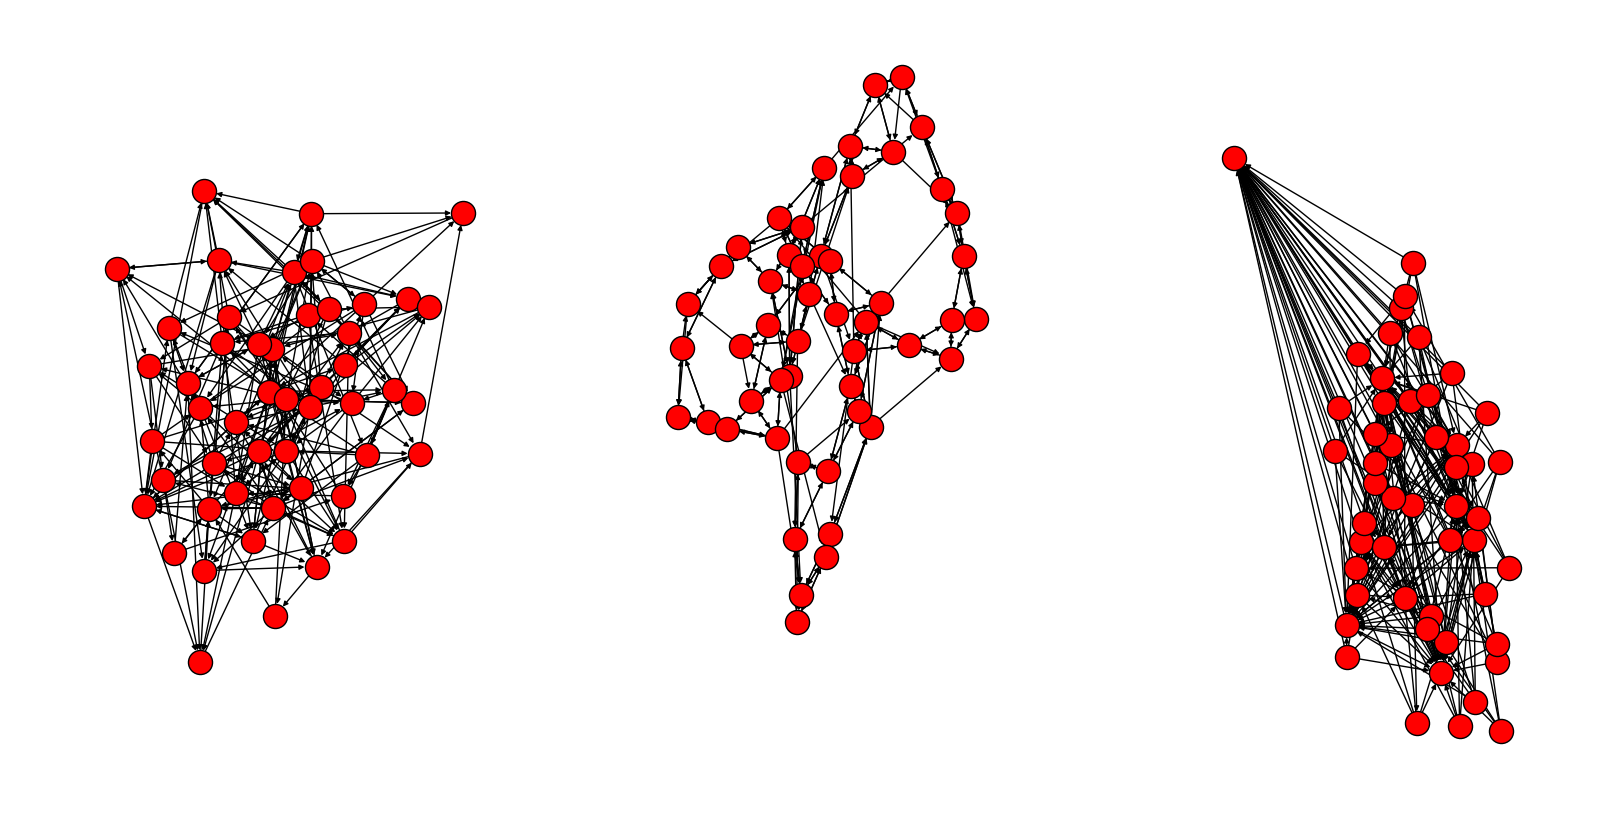

In [64]:
nets = make_graphs(p=0.1) 
fig, (axs) = pl.subplots(nrows=1, ncols=3, figsize=(20, 10));
for g,ax in zip(nets,axs):
    g=shuffle_nodes(g)
    nx.draw(g, ax=ax)

## Network measures

 - <font color=red>global</font> measures pertaining the complete graph
 
 - <font color=red>local</font> measures for a single node (often look at distributions of local node measures or averages)
 
 - <font color=red>regional</font>

## Connection density

<br>

$$ \text{connection density} = \frac{\text{realized connections}}{\text{possible connections}} $$

<br>

In [31]:
nets = make_graphs(N=100) 
for g in nets:
    print("N:", nx.number_of_nodes(g), "\t", "density:", nx.density(g))

N: 100 	 density: 0.09838383838383838
N: 100 	 density: 0.1009090909090909
N: 100 	 density: 0.09545454545454546


## Connection density

<br>

#### Local cortical circuits

0.05-0.25 (Song 2005, Lefort 2009)

#### Brain area networks

0.7-0.95 (Kennedy..)

## In- and out-degree distributions

Is a local measure

**In-degree** of a node is the number of <font color=red>incoming</font> connections

**Out-degree** of a node is the number of <font color=red>outgoing</font> connections

<br>

 In undirected graphs
 
 $$ \text{In-degree} = \text{out-degree}$$

<br>

Consistency: Equal number of "heads" and "tails" across graph matches

$$ \sum_{v \in V} \deg^-(v) = \sum_{v \in V} \deg^+(v) $$

## In-degree distributions

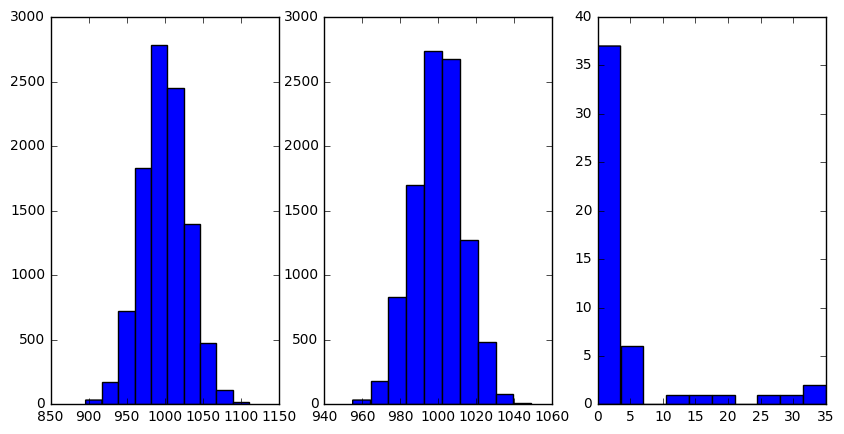

In [16]:
nets = make_graphs(N=10000) 
fig, (axs) = pl.subplots(nrows=1, ncols=3, figsize=(10, 5));
for g,ax in zip(nets,axs):
    ax.hist([x[1] for x in g.in_degree()])

## Clustering


(0.19012150824122306, 0.0001325756462677544)
(0.6219503325856077, 0.0008597488417681524)
(0.09145386994568497, 0.02420539056816474)


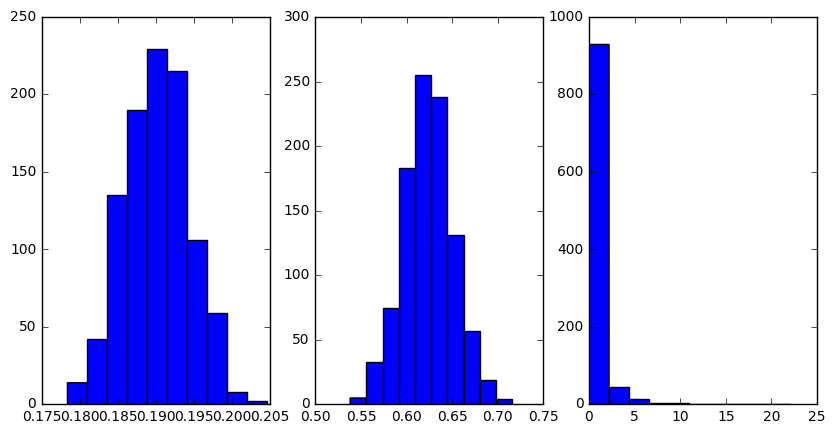

In [8]:
nets = make_graphs_gt(N=1000) 
fig, (axs) = pl.subplots(nrows=1, ncols=3, figsize=(10, 5));
for g,ax in zip(nets,axs):
    print(gt.global_clustering(g))
    ax.hist(list(gt.local_clustering(g)))

## Shortest Paths

In [9]:
def simple_graph():

    G = nx.DiGraph()

    G.add_edges_from(
        [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
         ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])

    val_map = {'A': 1.0,
               'D': 0.5714285714285714,
               'H': 0.0}

    values = [val_map.get(node, 0.25) for node in G.nodes()]

    pl.axis('off')
    nx.draw_networkx(G, node_color = 'white')

    return G

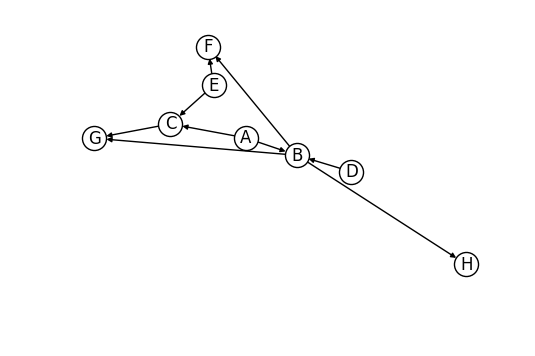

In [10]:
G = simple_graph()

In [11]:
nx.shortest_path(G, 'A', 'G')

['A', 'C', 'G']

In [12]:
#nx.shortest_path(G, 'F', 'G')

## Shortest Paths

In [13]:
nets = make_graphs(N=10)#00) 
#fig, (axs) = pl.subplots(nrows=1, ncols=3, figsize=(10, 5));
for g,ax in zip(nets,axs):
    print(nx.average_shortest_path_length(g))
    #print([list(nx.shortest_path_length(g)))

NetworkXError: Graph is not weakly connected.

In [ ]:
# overflow

nets = make_graphs_gt(N=50) 
#pl.switch_backend('cairo')
#fig, (axs) = pl.subplots(nrows=1, ncols=3, figsize=(20, 10));

#for g,ax in zip(nets,axs):

#fig=pl.figure()
#ax=fig.add_subplot(111)
for k in range(3):
    pos=gt.random_layout(nets[-2],0)
    gt.graph_draw(nets[-2],pos=pos)#, mplfig=ax);
    
#fig.savefig('new.png')